# Import packages

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
data_link = 'https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv'

sales = pd.read_csv(data_link, parse_dates=['Date'])

In [11]:
sales.head(5)
clear_output()

In [12]:
sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
sales['Date'] = pd.to_datetime(sales['Date'])

## Mean of Customer Age

In [14]:
mean_cus_age = sales['Customer_Age'].mean()
mean_cus_age

35.91921157861212

<AxesSubplot:ylabel='Density'>

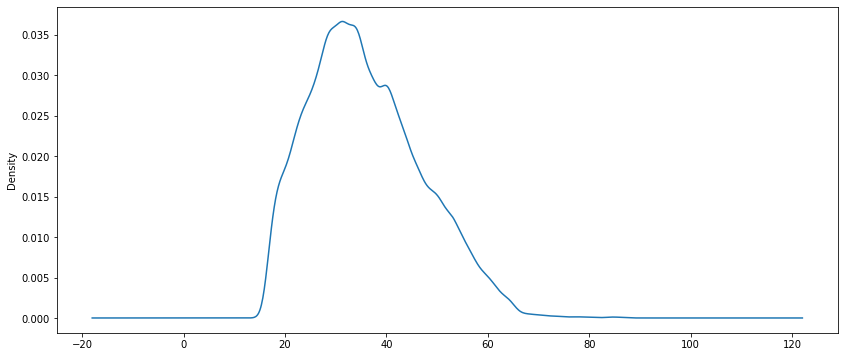

In [14]:
sales['Customer_Age'].plot(kind = 'kde', figsize = (14,6))

<AxesSubplot:>

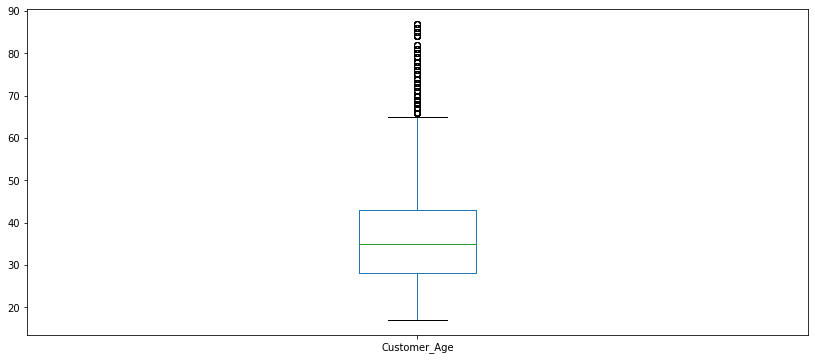

In [15]:
sales['Customer_Age'].plot(kind = 'box',figsize = (14,6))

## Mean of Order_Quantity

In [20]:
mean_order_qty = sales['Order_Quantity'].mean()
mean_order_qty

11.901659648253654

In [3]:
sales['Order_Quantity'].plot(kind = 'hist',bins = 30 ,figsize = (14,6))

In [4]:
sales['Order_Quantity'].plot(kind = 'box', vert = False, figsize = (14,6))

In [28]:
sales['Year'].unique()

array([2013, 2015, 2014, 2016, 2012, 2011])

In [44]:
sales[['Year','Revenue']].groupby(by = 'Year').sum().reset_index()

,Year,Revenue
0,2011,8964888
1,2012,9175983
2,2013,15240037
3,2014,14152724
4,2015,20023991
5,2016,17713385


In [5]:
sales[['Year','Revenue']].groupby(by = 'Year').sum().plot(kind = 'pie', figsize = (14,6), subplots = True)

In [38]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2011     2677
2012     2677
Name: Year, dtype: int64

In [6]:
# sales['Year'].value_counts().plot(kind = 'pie', figsize = (14,6))

## How many sales per month

In [23]:
sales_per_month = sales['Month'].value_counts().reset_index()
sales_per_month.columns = ['Month','Value']
sales_per_month.sort_values(by = 'Month')

,Month,Value
3,April,10182
9,August,8200
1,December,11200
6,February,9022
5,January,9284
11,July,7462
0,June,11234
4,March,9674
2,May,11128
8,November,8734


In [7]:
sales_per_month.plot(x = 'Month',y = 'Value',kind = 'bar', figsize = (14,6))

## List of products sold

In [56]:
product_list = sales['Product'].unique()
product_list
clear_output()

##  Top 10 most sold products

In [59]:
sales['Product'].value_counts().head(10).plot(kind = 'bar', figsize = (14,5))
clear_output()

## Relationship between Unit Cost and Unit Price

In [9]:
sales.plot(kind = 'scatter', x = 'Unit_Cost', y = 'Unit_Price', figsize = (14,6))

## Relationship between Order Quantity & Profit

In [8]:
sales.plot(kind = 'scatter', x = 'Order_Quantity', y = 'Profit', figsize = (14,6))

In [61]:
sales[['Country','Profit']].groupby(by = 'Country').sum().reset_index()

,Country,Profit
0,Australia,6776030
1,Canada,3717296
2,France,2880282
3,Germany,3359995
4,United Kingdom,4413853
5,United States,11073644


<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

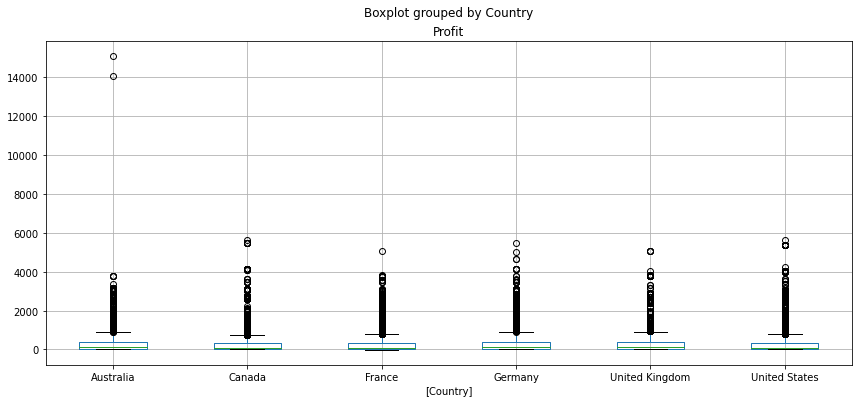

In [60]:
sales[['Country','Profit']].boxplot(by = 'Country', figsize = (14,6))